In [1]:
#import pandas library for the data processing
import pandas as pd

In [2]:
#use read_csv function to read the csv file
dataset=pd.read_csv("insurance_pre.csv")
dataset

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [3]:
#Print the columns in the csv
dataset.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges'], dtype='object')

In [4]:
#get_dummies with drop_first=True to remove the repedetive column
dataset=pd.get_dummies(dataset,dtype=int,drop_first=True)
dataset

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27.900,0,16884.92400,0,1
1,18,33.770,1,1725.55230,1,0
2,28,33.000,3,4449.46200,1,0
3,33,22.705,0,21984.47061,1,0
4,32,28.880,0,3866.85520,1,0
...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0
1334,18,31.920,0,2205.98080,0,0
1335,18,36.850,0,1629.83350,0,0
1336,21,25.800,0,2007.94500,0,0


In [5]:
#print the column names
dataset.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes'], dtype='object')

In [6]:
#Prepare the dependent/input dataset
independent=dataset[['age', 'bmi', 'children','sex_male', 'smoker_yes']]
independent

,age,bmi,children,sex_male,smoker_yes
0,19,27.900,0,0,1
1,18,33.770,1,1,0
2,28,33.000,3,1,0
3,33,22.705,0,1,0
4,32,28.880,0,1,0
...,...,...,...,...,...
1333,50,30.970,3,1,0
1334,18,31.920,0,0,0
1335,18,36.850,0,0,0
1336,21,25.800,0,0,0


In [7]:
#prepare the dependent/output dataset
dependent=dataset[['charges']]
dependent

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [8]:
#Split the train and test dataset using sklearn
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(independent,dependent,test_size=0.30,random_state=0)
print(X_train)
print(Y_train)
print(X_test)
print(Y_test)

      age     bmi  children  sex_male  smoker_yes
1163   18  28.215         0         0           0
196    39  32.800         0         0           0
438    52  46.750         5         0           0
183    44  26.410         0         0           0
1298   33  27.455         2         1           0
...   ...     ...       ...       ...         ...
763    27  26.030         0         1           0
835    42  35.970         2         1           0
1216   40  25.080         0         1           0
559    19  35.530         0         1           0
684    33  18.500         1         0           0

[936 rows x 5 columns]
          charges
1163   2200.83085
196    5649.71500
438   12592.53450
183    7419.47790
1298   5261.46945
...           ...
763    3070.80870
835    7160.33030
1216   5415.66120
559    1646.42970
684    4766.02200

[936 rows x 1 columns]
      age     bmi  children  sex_male  smoker_yes
578    52  30.200         1         1           0
610    47  29.370         1         

In [9]:
#Create Model
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

In [10]:
#get weight of the model
weight=regressor.coef_
weight

array([[  257.8006705 ,   321.06004271,   469.58113407,   -41.74825718,
        23418.6671912 ]])

In [11]:
#get bias of the model
bias=regressor.intercept_
bias

array([-12057.244846])

In [12]:
#result of the predict X_test
Y_predict=regressor.predict(X_test)
Y_predict

array([[11472.23618644],
       [ 9958.50125569],
       [37657.06917237],
       [15949.13223617],
       [ 6885.72312017],
       [ 3528.88810655],
       [ 1031.86224676],
       [14181.1024054 ],
       [ 8847.14792524],
       [ 7275.30131109],
       [ 4216.86216451],
       [10190.14526672],
       [ 9097.46039634],
       [ 4255.14691858],
       [27430.50340855],
       [11282.58288365],
       [11177.22736522],
       [ 5504.64625133],
       [ 8030.81149341],
       [26327.41490839],
       [33367.35431038],
       [14177.00561427],
       [11261.11883838],
       [32413.15484705],
       [ 4414.81928993],
       [ 8606.98618122],
       [  712.30206629],
       [10258.50678538],
       [ 4198.66143865],
       [10231.92533963],
       [ 8874.73800132],
       [40207.90493832],
       [15892.29406482],
       [14055.58336707],
       [24136.79051345],
       [ 4643.98226168],
       [12953.8618379 ],
       [30694.2595505 ],
       [33135.3543329 ],
       [ 3790.06798605],


In [13]:
#Validation of the model Y_predict Vs Y_test
from sklearn.metrics import r2_score
r2=r2_score(Y_test,Y_predict)
r2

0.7894790349867009

In [30]:
residuals=Y_test-Y_predict
residuals

,charges
578,-1747.706186
610,-1410.809956
569,8044.953178
1034,-2999.061036
198,2758.529380
...,...
1261,-4223.173389
494,-8920.949802
97,-4143.938009
418,-3024.261815


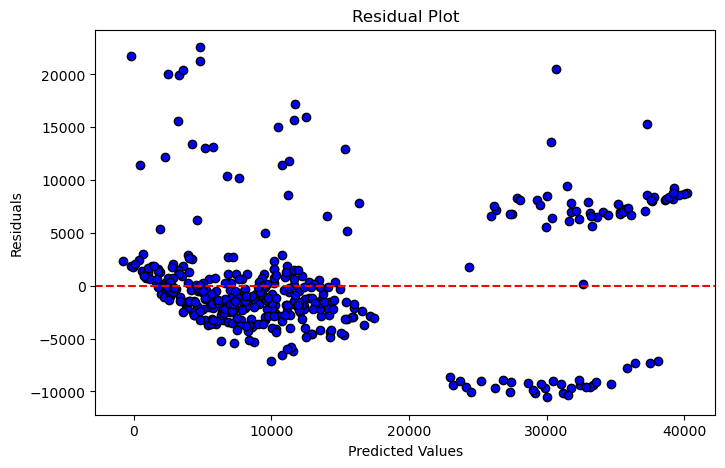

In [32]:
import matplotlib.pyplot as plt
# Plotting residuals
plt.figure(figsize=(8, 5))
plt.scatter(Y_predict, residuals, color='blue', edgecolor='k')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()